#                          **Ce travail consiste à réaliser un modèle de valorisation des entreprises**

### Importation des bibliotheques

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Importation des databases

In [58]:
Data = pd.read_csv('Data/BD-transac.csv')
Data.head()

,Target_Company,sector Merger Market,subsector,Revenue,EBITDA,EBITDA sur Revenue,MOYENNE EB,Earnings,Earnings sur Revenue,Moyenne ER,zoneGéog_Target_Dominant_Country,Implied_Equity_Value,Net_Debt,Enterprise_Value,Unnamed: 14,Unnamed: 15
0,Resilient a.s.,Agriculture,#1,14.0000,2.3000,0.164286,0.188836,0.878364,0.062740,0.06274,Europe de l'Est,NaN,NaN,12.9000,NaN,NaN
1,Ruralco Holdings Limited,Agriculture,#1,1176.0371,39.8998,0.033927,NaN,15.475600,0.013159,NaN,Océanie,290.7888,75.4039,366.1927,NaN,NaN
2,Mezort Altalanos Befektetesi Zrt.-t,Agriculture,#1,32.2289,8.0572,0.249999,NaN,2.022050,0.062740,NaN,Europe de l'Est,NaN,NaN,34.0777,NaN,NaN
3,Voeders Algoet,Agriculture,#1,40.0000,2.0000,0.050000,NaN,2.509611,0.062740,NaN,Europe de l'Ouest,NaN,NaN,14.0000,NaN,NaN
4,Cherkizovo Group PJSC (21.05% Stake),Agriculture,#1,1280.0245,154.0217,0.120327,NaN,29.807600,0.023287,NaN,Europe de l'Est,831.4600,628.1900,1459.6500,NaN,NaN


In [59]:
Data = Data.drop('Unnamed: 14', axis = 1)
Data = Data.drop('Unnamed: 15', axis = 1)
Data.columns

Index(['Target_Company', 'sector Merger Market', 'subsector', 'Revenue',
       'EBITDA', 'EBITDA sur Revenue', 'MOYENNE EB', 'Earnings',
       'Earnings sur Revenue', 'Moyenne ER',
       'zoneGéog_Target_Dominant_Country', 'Implied_Equity_Value ', 'Net_Debt',
       'Enterprise_Value'],
      dtype='object')

### Analyse Exploratoire des données

In [60]:
#Taille des données
print ("\033[1m" +'Nombre de colonnes de la database : ', Data.shape[1])
print ("\033[1m" +'Nombre de lignes de la database : ', Data.shape[0])

Nombre de colonnes de la database :  14
Nombre de lignes de la database :  21302


In [61]:
Data.describe()

KeyboardInterrupt: 

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21302 entries, 0 to 21301
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Target_Company                    21302 non-null  object 
 1   sector Merger Market              21302 non-null  object 
 2   subsector                         21302 non-null  object 
 3   Revenue                           21302 non-null  float64
 4   EBITDA                            21301 non-null  float64
 5   EBITDA sur Revenue                21302 non-null  float64
 6   MOYENNE EB                        2540 non-null   float64
 7   Earnings                          21272 non-null  float64
 8   Earnings sur Revenue              21302 non-null  float64
 9   Moyenne ER                        12867 non-null  float64
 10  zoneGéog_Target_Dominant_Country  21302 non-null  object 
 11  Implied_Equity_Value              16651 non-null  float64
 12  Net_

In [ ]:
#Nombre et pourcentage des valeurs nulles par colonne
na = pd.DataFrame (Data.isna().sum())
na['Pourcentage na'] = na*100/21302
na = na.rename( columns={0 : 'somme na'} )
na


,somme na,Pourcentage na
Target_Company,0,0.000000
sector Merger Market,0,0.000000
subsector,0,0.000000
Revenue,0,0.000000
EBITDA,1,0.004694
EBITDA sur Revenue,0,0.000000
MOYENNE EB,18762,88.076237
Earnings,30,0.140832
Earnings sur Revenue,0,0.000000
Moyenne ER,8435,39.597221


Text(0.5, 1.0, 'Nombre des valeurs nulles par columns')

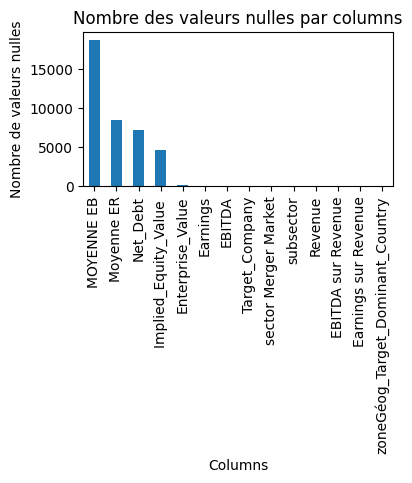

In [ ]:
#Visualisation du nombre des valeurs nulles 
na = Data.isnull().sum().sort_values( ascending = False )
na.plot(kind = 'bar', figsize = (4,2), fontsize = 10)
plt.xlabel('Columns')
plt.ylabel('Nombre de valeurs nulles')
plt.title('Nombre des valeurs nulles par columns')

In [ ]:
Data

,Target_Company,sector Merger Market,subsector,Revenue,EBITDA,EBITDA sur Revenue,MOYENNE EB,Earnings,Earnings sur Revenue,Moyenne ER,zoneGéog_Target_Dominant_Country,Implied_Equity_Value,Net_Debt,Enterprise_Value
0,Resilient a.s.,Agriculture,#1,14.0000,2.3000,0.164286,0.188836,0.878364,0.062740,0.06274,Europe de l'Est,NaN,NaN,12.9000
1,Ruralco Holdings Limited,Agriculture,#1,1176.0371,39.8998,0.033927,NaN,15.475600,0.013159,NaN,Océanie,290.7888,75.4039,366.1927
2,Mezort Altalanos Befektetesi Zrt.-t,Agriculture,#1,32.2289,8.0572,0.249999,NaN,2.022050,0.062740,NaN,Europe de l'Est,NaN,NaN,34.0777
3,Voeders Algoet,Agriculture,#1,40.0000,2.0000,0.050000,NaN,2.509611,0.062740,NaN,Europe de l'Ouest,NaN,NaN,14.0000
4,Cherkizovo Group PJSC (21.05% Stake),Agriculture,#1,1280.0245,154.0217,0.120327,NaN,29.807600,0.023287,NaN,Europe de l'Est,831.4600,628.1900,1459.6500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21297,"United Water Resources, Inc.",Utilities (other),#135,316.0273,118.9206,0.376299,0.269386,37.968000,0.120142,NaN,Amérique du Sud,2883.4347,759.1489,3642.5836
21298,Nalco Holding Co.,Utilities (other),#135,1417.4481,139.2451,0.098236,0.269386,34.143200,0.024088,NaN,Amérique du Sud,3953.9845,0.0000,3953.9845
21299,Superior Services Inc.,Utilities (other),#135,286.0898,75.0781,0.262428,0.269386,18.343300,0.064117,NaN,Amérique du Sud,953.9171,127.0200,1080.9371
21300,York Waterworks,Utilities (other),#135,14.0451,5.6523,0.402439,0.269386,3.796700,0.270322,NaN,Europe de l'Ouest,47.9705,7.2240,55.1944


In [ ]:
#Visualaisation de l'entreprise value en fonctin de l'EBITDA sur Revenue
EV_EBITDA_Revenue = Data[['Enterprise_Value', 'EBITDA sur Revenue', 'sector Merger Market']]
EV_EBITDA_Revenue.head()

,Enterprise_Value,EBITDA sur Revenue,sector Merger Market
0,12.9000,0.164286,Agriculture
1,366.1927,0.033927,Agriculture
2,34.0777,0.249999,Agriculture
3,14.0000,0.050000,Agriculture
4,1459.6500,0.120327,Agriculture


In [ ]:
fig = px.scatter( EV_EBITDA_Revenue, x='EBITDA sur Revenue', y='Enterprise_Value' , title = 'EV et EBITDA / reven', color = 'sector Merger Market')
fig.show()

#### Correlations

C:\Users\hh\AppData\Local\Temp\ipykernel_9220\2223482349.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

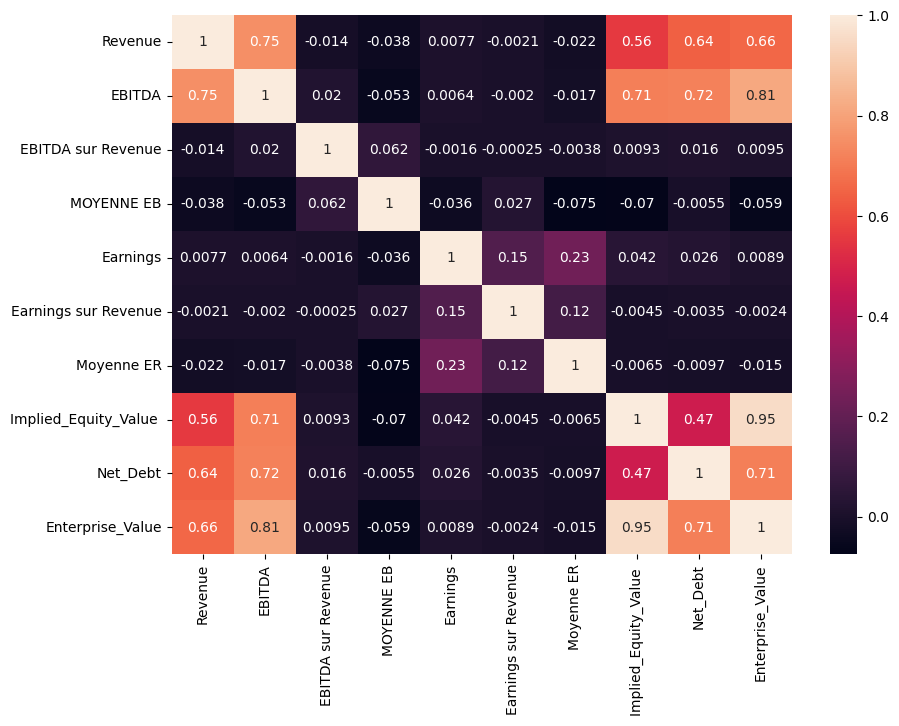

In [ ]:
matrice_correlation = Data.corr()
#matrice_correlation
plt.figure(figsize = (10,7) )
sns.heatmap (matrice_correlation, annot = True)

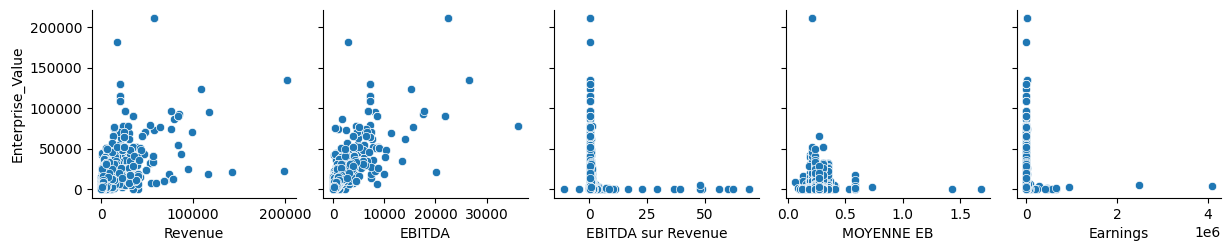

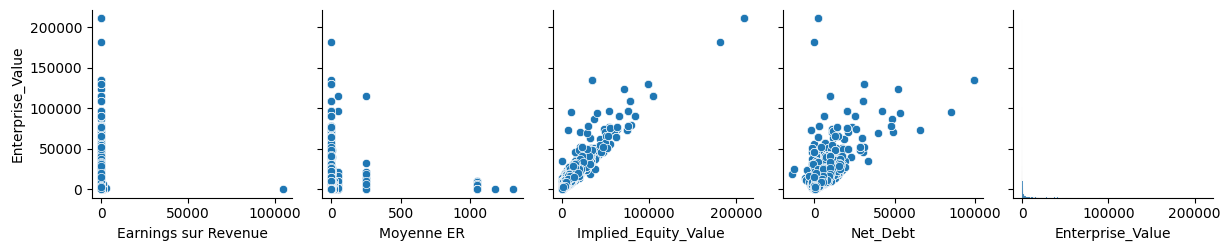

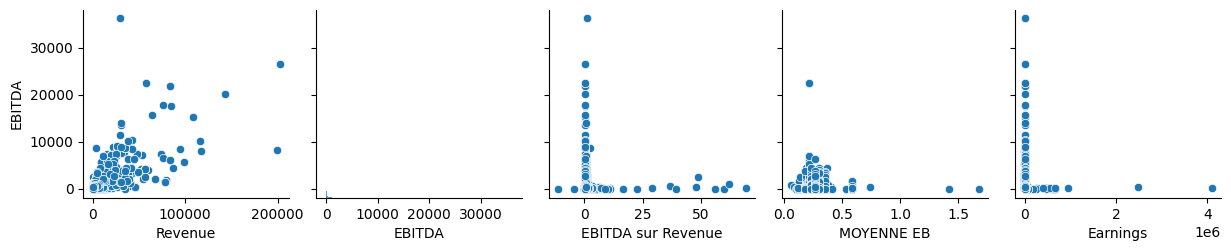

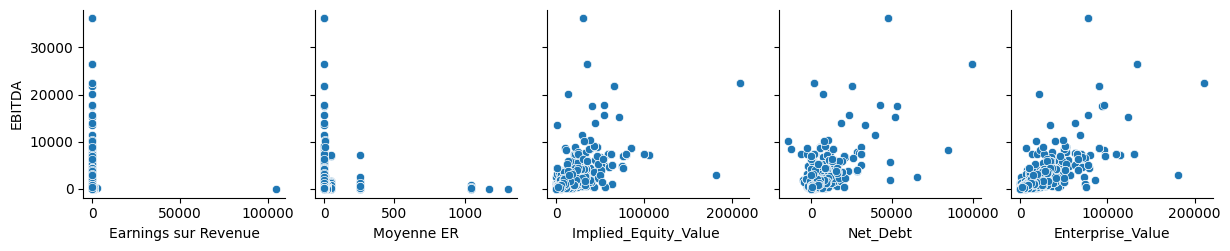

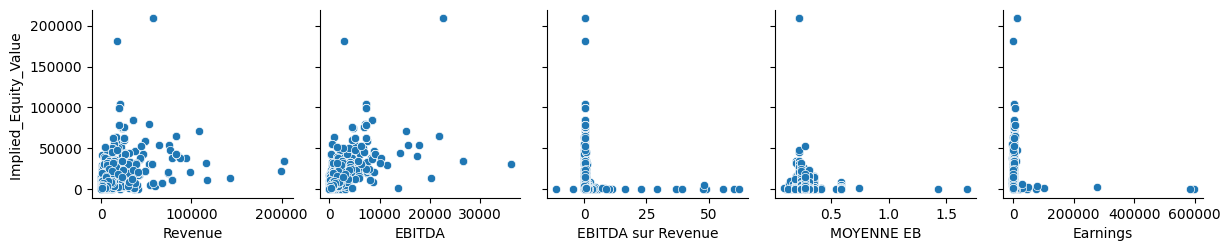

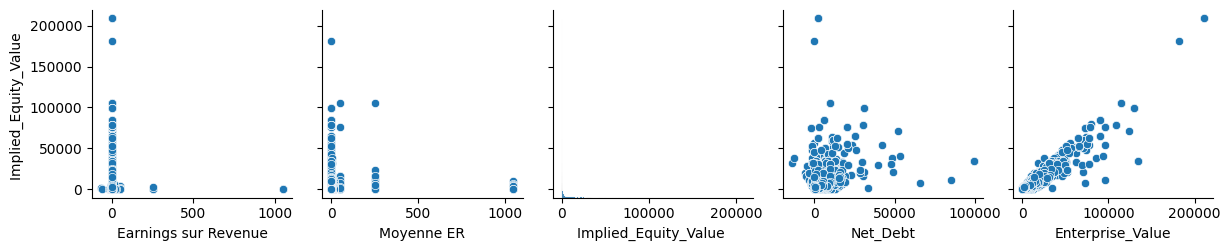

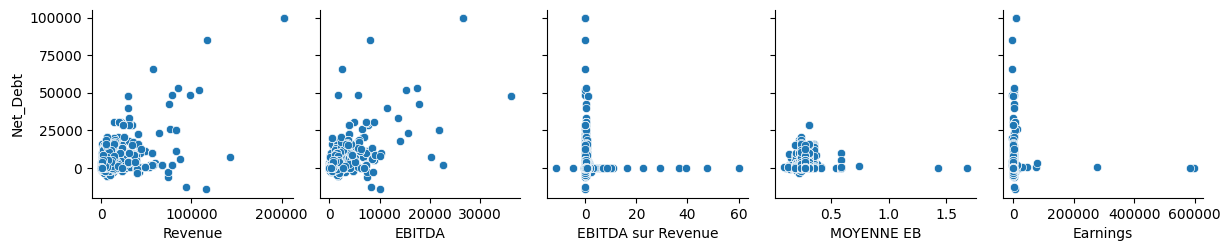

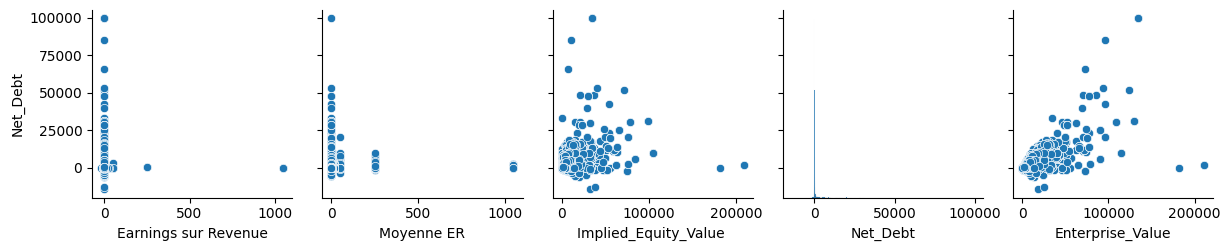

In [63]:
#Voyant les graphes de corrélations entre les colonnes
Data_type_float = Data.select_dtypes(include = 'float64')    
for i in range(0, len(Data_type_float.columns), 5):
    sns.pairplot(data=Data_type_float,
                x_vars=Data_type_float.columns[i:i+5],
                y_vars=['Enterprise_Value'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().